In [230]:
import pandas as pd
import numpy as np

In [231]:
heart_dataset = pd.read_csv('/content/heart failur classification dataset.csv')
heart_dataset.head(3)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


In [232]:
heart_dataset.shape

(299, 14)

In [233]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [234]:
heart_dataset = heart_dataset.drop(['time'], axis = 1)
heart_dataset = heart_dataset.drop(['serum_sodium'], axis = 1)
heart_dataset.shape

(299, 12)

In [235]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [236]:
heart_dataset['sex']=heart_dataset['sex'].map({'Male':0,'Female':1})
heart_dataset['smoking']=heart_dataset['smoking'].map({'No':0,'Yes':1})

Logistic Regression

In [237]:
# Import the dependencies for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [238]:
X = heart_dataset.iloc[:, :-1]
y = heart_dataset.iloc[:, -1]

In [239]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [240]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)
score1 = accuracy_score(y_test, predictions)
print("Accuracy using Logistic Regression")
print(score1)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0]
Accuracy using Logistic Regression
0.7833333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score2 = accuracy_score(y_pred,y_test)
print("Accuracy using Decision Tree")
print(score2)

Accuracy using Decision Tree
0.8333333333333334


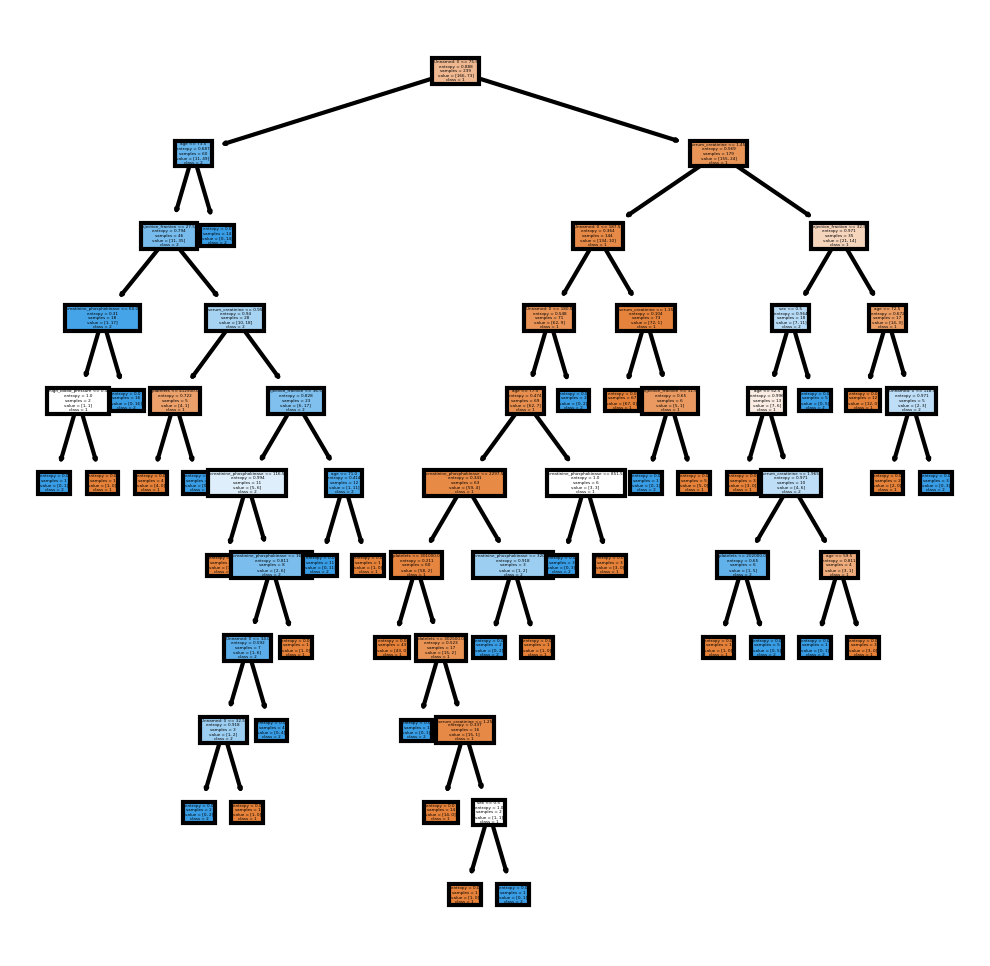

In [242]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['1','2','3','4','5','6','7'],
               filled = True);

Comparing Accuracy 

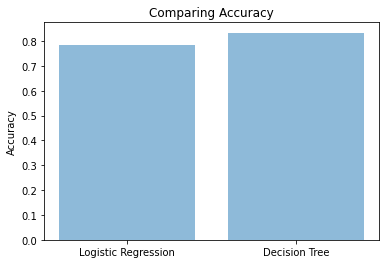

In [243]:
#barchart
plt.bar(['Logistic Regression', 'Decision Tree'],[score1, score2], align='center' ,alpha=0.5)
plt.title('Comparing Accuracy')
plt.ylabel("Accuracy")
plt.show()